# Italian international market analysis for dairy products

by Danilo Pierpaoli, 26/09/22. The purpose of this work is not analyse the international dairy italian market, to identify patterns in the data and distribution that can signal the sensitivity of italian market to systemtic risk. The questions we are going to try to answer are: Who are the biggest partners? How much value have the export and import? How diversified is the market? How bidirectional are the flows?

We will use the United Nation Comtrade database API for this purpose.

In [1]:
%matplotlib inline
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


Link for the location is obtained by comtrade database and view link for API call. format csv had been added at the end of the link (&fmt=csv)

In [2]:

LOCATION = "http://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2021&r=381&p=0%2Call&rg=all&cc=04%2C040110%2C040120%2C040130%2C040140%2C040150%2C040210%2C040221%2C040229%2C040291%2C040299%2C040310%2C040320%2C040390%2C040410%2C040490%2C040500%2C040510%2C040520%2C040590&fmt=csv"

In [3]:
df = read_csv(LOCATION)
df.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H5,2021,2021,2021,2,0,1,Import,381,Italy,...,0,NaN,NaN,NaN,0.0,NaN,4412422730,NaN,NaN,4
1,H5,2021,2021,2021,2,0,2,Export,381,Italy,...,0,NaN,NaN,NaN,0.0,NaN,4956485386,NaN,NaN,4
2,H5,2021,2021,2021,2,0,3,Re-Export,381,Italy,...,0,NaN,NaN,NaN,0.0,NaN,1123405,NaN,NaN,0
3,H5,2021,2021,2021,6,1,1,Import,381,Italy,...,195209702,NaN,NaN,NaN,195209702.0,NaN,62565358,NaN,NaN,0
4,H5,2021,2021,2021,6,1,2,Export,381,Italy,...,4329676,NaN,NaN,NaN,4329676.0,NaN,5892071,NaN,NaN,0


In [4]:
df.dtypes

Classification             object
Year                        int64
Period                      int64
Period Desc.                int64
Aggregate Level             int64
Is Leaf Code                int64
Trade Flow Code             int64
Trade Flow                 object
Reporter Code               int64
Reporter                   object
Reporter ISO               object
Partner Code                int64
Partner                    object
Partner ISO                object
2nd Partner Code          float64
2nd Partner               float64
2nd Partner ISO           float64
Customs Proc. Code        float64
Customs                   float64
Mode of Transport Code    float64
Mode of Transport         float64
Commodity Code              int64
Commodity                  object
Qty Unit Code               int64
Qty Unit                   object
Qty                         int64
Alt Qty Unit Code         float64
Alt Qty Unit              float64
Alt Qty                   float64
Netweight (kg)

In [5]:
df['Reporter Code']

0      381
1      381
2      381
3      381
4      381
      ... 
497    381
498    381
499    381
500    381
501    381
Name: Reporter Code, Length: 502, dtype: int64

We can see that in loading the CSV file, the columns data types commodity code and reporter code had been setted to int64, which dropped the 0. In fact the commodity code can be 040510 and not 40510. Similarly reported code is 0381. We reload again our dataframe considering the data types of these column as strings.

In [6]:
df = read_csv(LOCATION, dtype = {'Reporter Code':str, 'Commodity Code':str})
df.dtypes

Classification             object
Year                        int64
Period                      int64
Period Desc.                int64
Aggregate Level             int64
Is Leaf Code                int64
Trade Flow Code             int64
Trade Flow                 object
Reporter Code              object
Reporter                   object
Reporter ISO               object
Partner Code                int64
Partner                    object
Partner ISO                object
2nd Partner Code          float64
2nd Partner               float64
2nd Partner ISO           float64
Customs Proc. Code        float64
Customs                   float64
Mode of Transport Code    float64
Mode of Transport         float64
Commodity Code             object
Commodity                  object
Qty Unit Code               int64
Qty Unit                   object
Qty                         int64
Alt Qty Unit Code         float64
Alt Qty Unit              float64
Alt Qty                   float64
Netweight (kg)

Now we can drop all the columns we are not interested to, leaving only the relevant for analysis one.

In [7]:
COLUMNS = ['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
df = df[COLUMNS]
df.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2021,2021,Import,Italy,World,Dairy produce; birds' eggs; natural honey; edi...,04,4412422730
1,2021,2021,Export,Italy,World,Dairy produce; birds' eggs; natural honey; edi...,04,4956485386
2,2021,2021,Re-Export,Italy,World,Dairy produce; birds' eggs; natural honey; edi...,04,1123405
3,2021,2021,Import,Italy,World,"Dairy produce; milk and cream, not concentrate...",040110,62565358
4,2021,2021,Export,Italy,World,"Dairy produce; milk and cream, not concentrate...",040110,5892071


Below the list of dairy product traded:

In [8]:
df.groupby('Commodity Code')['Commodity'].apply(lambda x: np.unique(x))

Commodity Code
04        [Dairy produce; birds' eggs; natural honey; ed...
040110    [Dairy produce; milk and cream, not concentrat...
040120    [Dairy produce; milk and cream, not concentrat...
040140    [Dairy produce; milk and cream, not concentrat...
040150    [Dairy produce; milk and cream, not concentrat...
040210    [Dairy produce; milk and cream, concentrated o...
040221    [Dairy produce; milk and cream, concentrated, ...
040229    [Dairy produce; milk and cream, containing add...
040291    [Dairy produce; milk and cream, concentrated, ...
040299    [Dairy produce; milk and cream, containing add...
040310    [Dairy produce; yoghurt, whether or not concen...
040390    [Dairy produce; buttermilk, curdled milk or cr...
040410    [Dairy produce; whey, whether or not concentra...
040490    [Dairy produce; natural milk constituents (exc...
040510           [Dairy produce; derived from milk, butter]
040520                       [Dairy produce; dairy spreads]
040590    [Dairy produce;

Now we are going to separate the dataframe in two groups: one with whole world as a partner and the other containing all the single countries.

In [9]:
df_world = df[df['Partner'] == 'World']
df_countries = df[df['Partner'] != 'World']


We can now subset the data and sort values to immediately see who are the biggest partner of Italy in import and export of dairy.

In [10]:
df_countries_import = df_countries[df_countries['Trade Flow'] == 'Import']
df_countries_import.sort_values('Trade Value (US$)',ascending = False).head(5)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
434,2021,2021,Import,Italy,Germany,Dairy produce; birds' eggs; natural honey; edi...,04,1495752912
419,2021,2021,Import,Italy,France,Dairy produce; birds' eggs; natural honey; edi...,04,630463229
120,2021,2021,Import,Italy,Belgium,Dairy produce; birds' eggs; natural honey; edi...,04,311624945
105,2021,2021,Import,Italy,Austria,Dairy produce; birds' eggs; natural honey; edi...,04,267199363
473,2021,2021,Import,Italy,Greece,Dairy produce; birds' eggs; natural honey; edi...,04,192036541


In [11]:
df_countries_export = df_countries[df_countries['Trade Flow'] == 'Export']
df_countries_export.sort_values('Trade Value (US$)', ascending = False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
420,2021,2021,Export,Italy,France,Dairy produce; birds' eggs; natural honey; edi...,04,909742528
435,2021,2021,Export,Italy,Germany,Dairy produce; birds' eggs; natural honey; edi...,04,778425180
121,2021,2021,Export,Italy,Belgium,Dairy produce; birds' eggs; natural honey; edi...,04,232329887
106,2021,2021,Export,Italy,Austria,Dairy produce; birds' eggs; natural honey; edi...,04,147673661
200,2021,2021,Export,Italy,Canada,Dairy produce; birds' eggs; natural honey; edi...,04,92859418


Now we are interested to see the biggest partners per commodity.

In [12]:
df_countries.groupby('Commodity Code')['Trade Value (US$)'].sum().sort_values(ascending = False)

Commodity Code
04        5693708969
040310     301573004
040120     250927083
040210     186420163
040510     169500787
040410     167095801
040390     143836463
040150     142392121
040221      95897748
040590      79865563
040490      78690951
040110      62250492
040291      40344053
040229      17635134
040299      10380829
040140       3970267
040520       1154629
Name: Trade Value (US$), dtype: int64

In [13]:
#commodity_groups = df_countries.groupby(['Commodity Code','Partner','Trade Flow','Commodity'], as_index= False)['Trade Value (US$)'].sum()
#commodity_groups = commodity_groups.sort_values('Trade Value (US$)', ascending = False)
df_countries = df_countries.sort_values(['Commodity Code','Trade Value (US$)'], ascending = False)
counter = 0

import_codes = {}
export_codes = {}
biggest_partners = []
def create_row(dataframe,counter):
    partner_row = []
    amount_traded = df_countries.iloc[counter]['Trade Value (US$)']
    country_of_trade = df_countries.iloc[counter]['Partner']
    flow_type = df_countries.iloc[counter]['Trade Flow']
    commodity_name = df_countries.iloc[counter]['Commodity']
    partner_row.extend([country_of_trade,flow_type,commodity_name,code,amount_traded])
    return partner_row
       
    
    
for code in df_countries['Commodity Code']:
    if df_countries.iloc[counter]['Trade Flow'] == 'Import':
        try:
            import_codes[code]
        except KeyError:
            export_row = create_row(df_countries,counter)  
            biggest_partners.append(export_row)                 
            import_codes[code] = True
    else:
        try:
            export_codes[code]
        except KeyError:
            import_row = create_row(df_countries,counter)
            biggest_partners.append(import_row)
            export_codes[code] = True   
        else:
            pass
    
    counter += 1



We can see below Italy's biggest sources of commodity, per each commodity type. Germany is the biggest exporter of 8 dairy commodities towards Italy, followed by 4 by France, 3 Belgium and 1 Austria 

In [14]:

columns = ['Country of trade', 'Flow type','Commodity Name','Code','Amount traded (US$)']
dataframe = DataFrame(columns = columns, data = biggest_partners)   
dataframe = dataframe.sort_values('Amount traded (US$)', ascending = False)
dataframe_import = dataframe[dataframe['Flow type'] == 'Import']
dataframe_export = dataframe[dataframe['Flow type'] == 'Export']

#Here method groupby is applied: The data is grouped for the country, then the aggregate method is applied defining a new column:
dataframe_import.groupby('Country of trade').agg(
    number_of_commodities= NamedAgg(column="Country of trade", aggfunc="count"))


,number_of_commodities
Country of trade,
Austria,1
Belgium,3
France,4
Germany,9


Graph representing the amount of business for the biggest import partners 

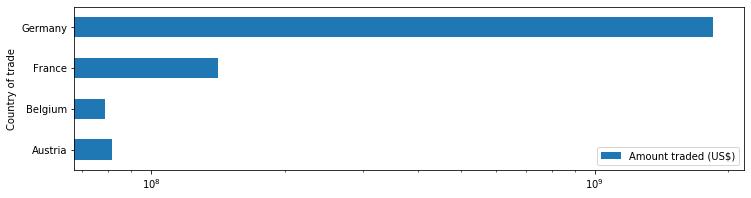

In [15]:

imports_aggregated = dataframe_import.groupby(['Country of trade'],as_index=False)['Amount traded (US$)'].sum()
imports_aggregated.plot(x = 'Country of trade',y = 'Amount traded (US$)',logx = True,  kind = 'barh', figsize = (12,3))

We repeat the same process for exports.

In [16]:
dataframe_export.groupby('Country of trade').agg(
    number_of_commodities= NamedAgg(column="Country of trade", aggfunc="count"))

,number_of_commodities
Country of trade,
Albania,3
Australia,1
Belgium,3
China,3
Denmark,1
France,3
Germany,3


We can see how for 5 countries are the biggest importer for 3 different commodities in Italy, suggesting that Italy's economy shares strong partnership with these countries. We can now visualise the amount of trade for these commodities.

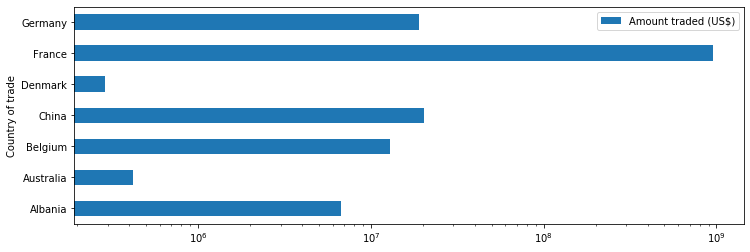

In [17]:
export_aggregate = dataframe_export.groupby(['Country of trade'],as_index=False)['Amount traded (US$)'].sum()
export_aggregate.plot(x = 'Country of trade',y = 'Amount traded (US$)',logx = True,  kind = 'barh', figsize = (12,4))

In [18]:
dataframe_export.groupby('Country of trade')['Amount traded (US$)'].sum()

Country of trade
Albania        6748734
Australia       418926
Belgium       12964128
China         20283967
Denmark         287472
France       959780684
Germany       19025603
Name: Amount traded (US$), dtype: int64

In [19]:
dataframe_import.groupby('Country of trade')['Amount traded (US$)'].sum()

Country of trade
Austria      81678433
Belgium      78547195
France      141359730
Germany    1849435239
Name: Amount traded (US$), dtype: int64

It's clear that the italian market for dairy products has come biggest partner of import Germany and France for export. We can now try and group the original dataframe and confirm for all dairy commodities this trend.

In [20]:
aggregated_partners = df_countries.groupby('Partner')['Trade Value (US$)'].sum().sort_values(ascending = False)
aggregated_partners

Partner
Germany                   2871450831
France                    2004399680
Belgium                    743589019
Austria                    648527048
Greece                     395258567
Czechia                    218396675
China                      132101657
Denmark                    106610320
Canada                      93025637
Australia                   59191971
Finland                     33302493
Croatia                     31576570
Bulgaria                    26233722
Albania                     24195618
Estonia                     17907590
Cyprus                       7262566
Brazil                       4719171
Chile                        4119302
Ethiopia                     3448324
Dominican Rep.               2782637
Belarus                      2280244
Colombia                     2169589
Georgia                      1996384
Argentina                    1782044
Costa Rica                   1645524
Azerbaijan                   1015904
Bosnia Herzegovina            

We are going to consider the 5 biggest partners.

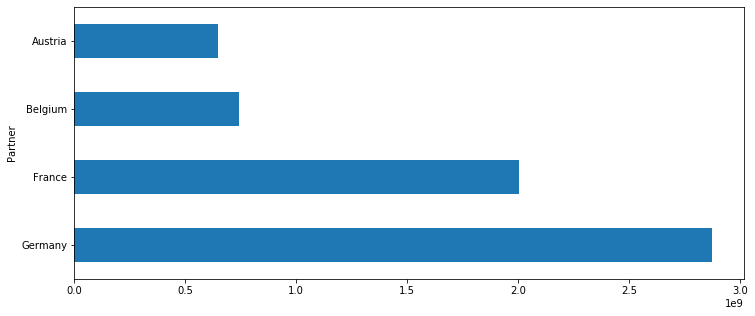

In [21]:
aggregated_partners.head(4).plot(kind = 'barh', figsize = (12,5))

We can plot a chart now to show import VS export. Italy imports a significant amount more dairy products examined than the amount exported. 

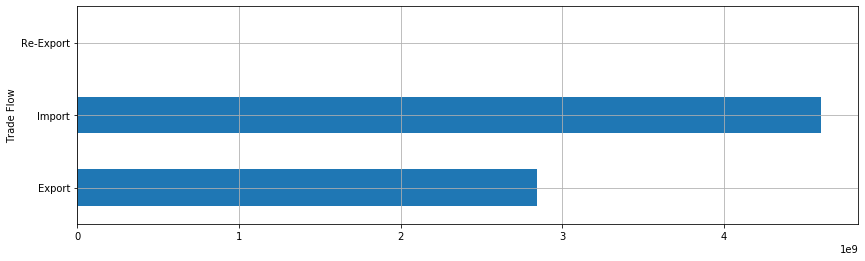

In [22]:
df_countries.groupby('Trade Flow')['Trade Value (US$)'].sum().plot(kind = 'barh', figsize =(14,4),grid = True )

Now would be finally interesting to see how much variability the volume of trade for or towards each country has for commodity.

In [23]:
df_import_data = DataFrame(
    df_countries_import.groupby('Partner')['Trade Value (US$)'].sum(),columns = ['Trade Value (US$)'])
df_import_std = df_countries_import.groupby('Partner')['Trade Value (US$)'].std()

#We ignore countries which only one commodity is traded
df_import_std = df_import_std.sort_values(ascending = False)[:13]
df_import_data = df_import_data.sort_values('Trade Value (US$)',ascending = False)[:13]
df_import_std


Partner
Germany     3.563295e+08
France      1.528151e+08
Belgium     7.639090e+07
Greece      7.016323e+07
Austria     6.531998e+07
Czechia     4.184808e+07
Denmark     9.657741e+06
Estonia     5.834646e+06
Finland     3.215155e+06
Croatia     2.096163e+06
China       2.030313e+06
Bulgaria    9.451980e+05
Cyprus      6.229179e+05
Name: Trade Value (US$), dtype: float64

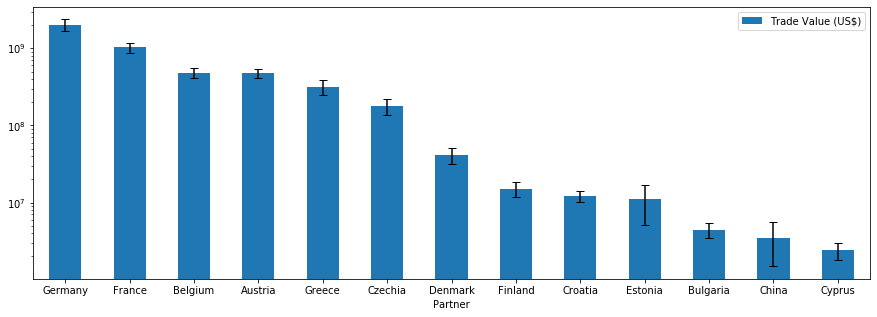

In [24]:

fig, ax = plt.subplots()

df_import_data.plot.bar(yerr=df_import_std, ax=ax, capsize=4, rot=0, figsize = (15,5), logy = True);

We can see variability of flows depending on commodity doesn't appear to be significant for the 4 biggest import partners with Italy. Same thing will be done now for exports.

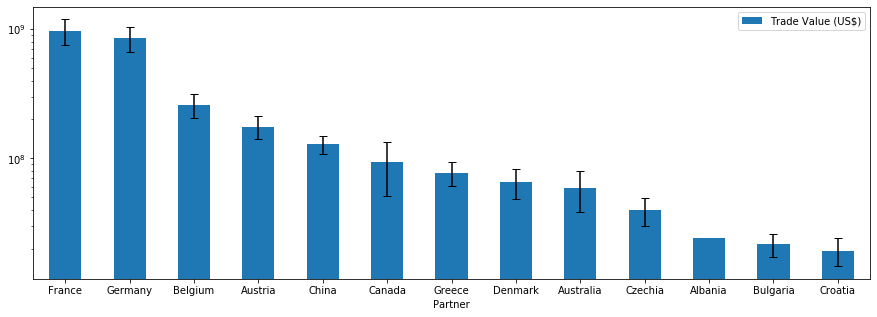

In [25]:
df_export_data = DataFrame(
    df_countries_export.groupby('Partner')['Trade Value (US$)'].sum(),columns = ['Trade Value (US$)'])
df_export_std = df_countries_export.groupby('Partner')['Trade Value (US$)'].std()

#We ignore countries which only one commodity is traded
df_export_std = df_export_std.sort_values(ascending = False)[:13]
df_export_data = df_export_data.sort_values('Trade Value (US$)',ascending = False)[:13]

fig, ax = plt.subplots()
df_export_data.plot.bar(yerr=df_export_std, ax=ax, capsize=4, rot=0, figsize = (15,5), logy = True);


Variability seems to be significant higher, probably because distrubution of italian export for dairy products seems to be spreaded across a large multitude of countries, while the imports are concentrated from few partners.

In [26]:
#splitting the dataframe for 'code' of commodity

commodities_groups = df_countries.groupby(['Commodity Code','Partner'])['Trade Value (US$)'].sum()

Would be useful to try and identify partner countries engaging in 'bi-derectional' trade who have total import values not greater than twice or smaller than half the total export value. We are going to use a pivot table for this purpose.

In [27]:
#We define a function that check whether the size of total values of export/import.

def isBiderectional(data):
    data_check = data.groupby('Trade Flow')['Trade Value (US$)'].sum()
    if len(data_check) == 1:
        return False
    return min(data_check) >=  max(data_check)* 0.5
    
def isNotBiderectional(data):
    data_check = data.groupby('Trade Flow')['Trade Value (US$)'].sum()
    if len(data_check) == 1:
        return False
    return min(data_check) <  max(data_check)* 0.5   
df_to_pivot = df_countries.groupby('Partner').filter(isBiderectional)
pivot_bidirect= pivot_table(df_to_pivot, index = ['Partner','Trade Flow'], values = 'Trade Value (US$)',aggfunc= sum)
pivot_bidirect

Trade Value (US$)
Partner   Trade Flow                   
Belgium   Export              260043606
          Import              483545413
Croatia   Export               19400138
          Import               12176432
Denmark   Export               65734849
          Import               40875471
Estonia   Export                6914704
          Import               10992886
Finland   Export               18232018
          Import               15070475
Guatemala Export                 365161
          Import                 191197

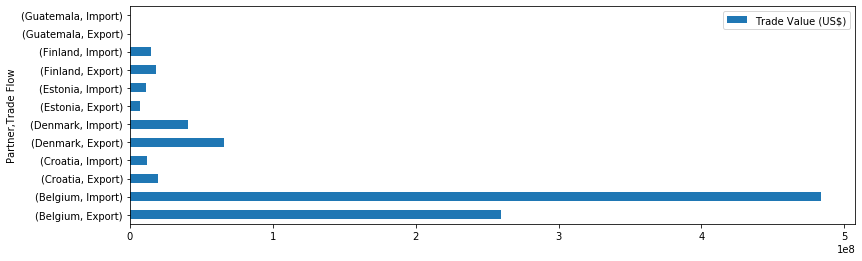

In [28]:
pivot_bidirect.plot(kind = 'barh',figsize = (13,4))

We can now check which flows have instead the biggest asimmetry.

In [29]:

def isNotBiderectional(data):
    data_check = data.groupby('Trade Flow')['Trade Value (US$)'].sum()
    return min(data_check) <  max(data_check)* 0.5

df_to_pivot = df_countries.groupby('Partner').filter(isNotBiderectional)
pivot_notBidir = pivot_table(df_to_pivot, index = ['Partner','Trade Flow'], values = 'Trade Value (US$)',aggfunc= sum)
pivot_notBidir

Trade Value (US$)
Partner   Trade Flow                   
Argentina Export                 225514
          Import                1556530
Australia Export               59050111
          Import                 141860
Austria   Export              175731474
          Import              472795574
Brazil    Export                4464904
          Import                 254267
Bulgaria  Export               21786148
          Import                4447574
Chile     Export                3920554
          Import                 198748
China     Export              128589175
          Import                3512482
Cuba      Export                 222398
          Import                  66532
Cyprus    Export                4860209
          Import                2402357
Czechia   Export               39677517
          Import              178719158
France    Export              969750968
          Import             1034640219
          Re-Export                8493
Germany   Export              849437659
          Import             2020898260
          Re-Export             1114912
Ghana     Export                 337889
          Import                   3544
Greece    Export               77013790
          Import              318244777

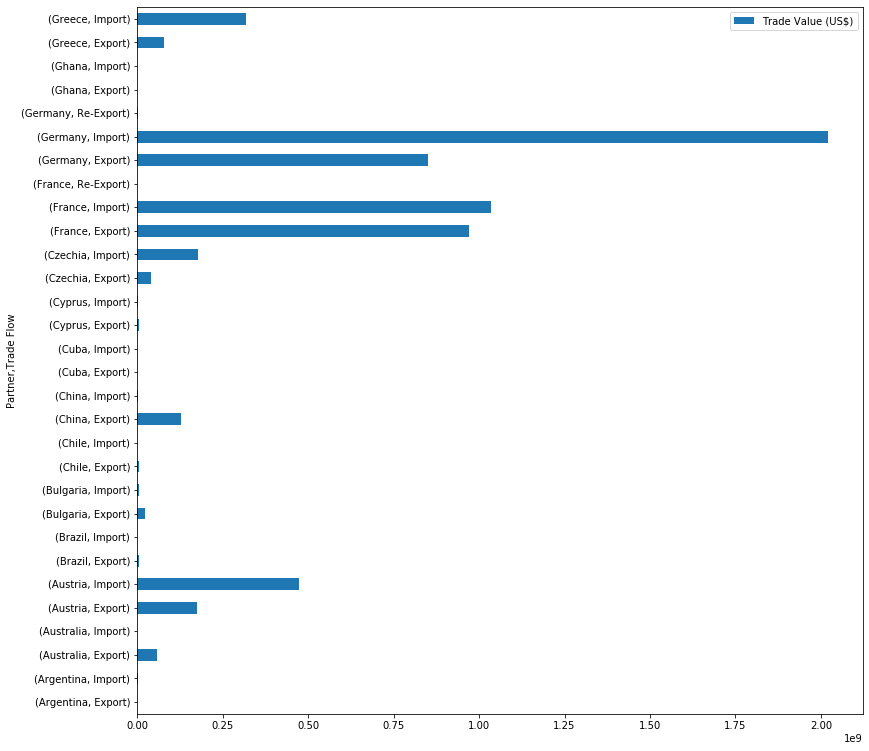

In [30]:
pivot_notBidir.plot(kind = 'barh', figsize = (13,13))

# Conclusions 

Italian total value of import for diary products was significantly higher (about 60% higher) than total value of export in the year 2021. This is a surprising result as Italy has the reputation of exporting large amount of unprocessed food all over the world. The biggest partners (Germany, France and Belgium) have a net negative flow of export in Italy for these dairy products.
Italy seems to have a larger disperse distribution of export(i.e. a larger global market, with more spreaded partners). A diversification in the export partners can for sure decrease the systemic risk of signficant fluctuations of export value, but at the same time Italy finds itself to rely on dairy supply from a limited amount of European partners, which means that there might be stronger flutations in market price, as they belong all to the same market area.